In [21]:
import cv2
from fastai.vision import *
from fastai.vision.image import pil2tensor, Image

In [2]:
path = "C:\\Users\\Linsu Han\\Documents\\[COLUMBIA]\\EECS 6895 - Adv Big Data Analytics\\"
fc = cv2.CascadeClassifier(path+'Milestone 3\\haarcascade_frontalface_default.xml')
learn = load_learner(path+'Milestone 3\\models', 'male_resnet50.pkl')

In [3]:
def extractFaceCoords(img, fc, tolerance):
    H, W, D = img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_coords = fc.detectMultiScale(gray, 1.2, tolerance, minSize=(60, 60))

    if len(face_coords) == 1:
        x, y, w, h = face_coords[0]
    elif len(face_coords) == 0:
        return None
    else:
        max_area = 0
        index = 0
        for i in range(len(face_coords)):
            _, _, wi, hi = face_coords[i]
            area = wi * hi
            if area > max_area:
                max_area = area
                index = i
        x, y, w, h = face_coords[index]

    return x, y, w, h

In [42]:
img = cv2.imread(path+'Milestone 3\\test\\01.jpg')
x, y, w, h = extractFaceCoords(img, fc, 1)
face_rgb = cv2.cvtColor(img[y:y+h, x:x+h], cv2.COLOR_BGR2RGB)
img_ = Image(pil2tensor(face_rgb, np.float32).div_(255))

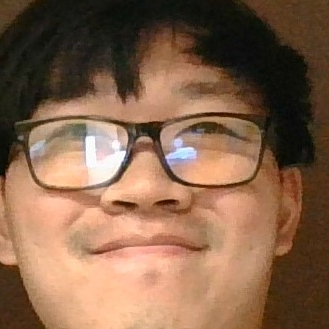

In [43]:
img_

In [44]:
learn.predict(img_)

(Category 1, tensor(1), tensor([0.0013, 0.9987]))